# Trabalho 1 - PDI
## Yhasmim de Souza Tigre - mat.: 20210026966

In [1]:
import matplotlib.pyplot as plt
import imageio.v2  as iio 
import numpy as np

In [2]:
shapes = iio.imread('Shapes.png') 
testpat = iio.imread('testpat.1k.color2.tif')
sailor = iio.imread('sailor.jpg')

mascara_pers = ('./mascara/masc_person.txt')
gaus5_1 = ('./mascara/masc_gau5_1.txt')
gaus5_10 = ('./mascara/masc_gau5_10.txt')
sobel_ver = ('./mascara/masc_sobvertical.txt')
sobel_hor = ('./mascara/masc_sobhorizontal.txt')

### Questão 1
> Correlação m x n com offset, sobre R, G e B. O offset e o filtro (dimensões e valores da máscara) devem ser definidos em um arquivo (txt) à parte. Realize testes com os filtros Gaussiano 5x5, Sobel horizontal e Sobel vertical, e explique os resultados. Utilize extensão por zeros. Para visualização do Sobel, aplique valor absoluto seguido por expansão de histograma para [0, 255].

In [3]:
def carregar_filtro_e_offset(file_path):
    """
    Carrega o filtro e o offset de um arquivo .txt.
    O arquivo deve conter as dimensões do filtro na primeira linha,
    os valores do filtro nas linhas seguintes, e o offset na última linha.
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Carregar dimensões do filtro
    m, _ = map(int, lines[0].strip().split())

    # Carregar o filtro (os valores do filtro estão nas linhas seguintes)
    filtro = []
    for line in lines[1:m+1]:
        filtro.append([float(x) for x in line.strip().split()])

    # Carregar o offset (última linha)
    offset = int(lines[m+1].strip())

    return filtro, offset

In [4]:
def correlacao(imagem, mascara, offset):
    """
    Realiza a correlação de uma imagem com o filtro fornecido, aplicando um offset.
    """
    altura, largura, canais = len(imagem), len(imagem[0]), len(imagem[0][0])
    m, n = len(mascara), len(mascara[0])

    imagem_saida = [[[0.0 for _ in range(canais)] for _ in range(largura)] for _ in range(altura)]

    # Extensão por zeros
    pad_x = m // 2
    pad_y = n // 2

    # Aplicando a correlação para cada canal da imagem (R, G, B)
    for canal in range(canais):
        for i in range(altura):
            for j in range(largura):
                soma = 0.0  # Somatório da correlação
                
                # Aplicando o filtro (máscara)
                for u in range(m):
                    for v in range(n):
                        # Coordenadas do pixel da imagem, levando em conta a extensão por zeros
                        x = i + u - pad_x
                        y = j + v - pad_y
                        
                        # Verificar se as coordenadas estão dentro da imagem (extensão por zeros)
                        if 0 <= x < altura and 0 <= y < largura:
                            soma += imagem[x][y][canal] * mascara[u][v]

                # Aplicar o offset
                imagem_saida[i][j][canal] = soma + offset
                
    
    # Ajuste de valores para visualização (clampear para 0-255)
    for i in range(altura):
        for j in range(largura):
            for canal in range(canais):
                if imagem_saida[i][j][canal] < 0:
                    imagem_saida[i][j][canal] = 0
                elif imagem_saida[i][j][canal] > 255:
                    imagem_saida[i][j][canal] = 255

    return imagem_saida

In [5]:
def expansao_histograma(sobel_resultado):

    sobel_absoluto = np.abs(sobel_resultado)
    
    valor_min = sobel_absoluto.min()
    valor_max = sobel_absoluto.max()
    
    # Evitar divisão por zero
    if valor_max == valor_min:
        return np.zeros(sobel_absoluto.shape, dtype=np.uint8)
    
    # Expansão do histograma para o intervalo [0, 255]
    resultado_expandido = 255 * (sobel_absoluto - valor_min) / (valor_max - valor_min)
    
    # Converter para uint8 para visualização
    return resultado_expandido.astype(np.uint8)

### Testes Questão 1

In [6]:
filtro_v, offset_v = carregar_filtro_e_offset(sobel_ver)
filtro_h, offset_h = carregar_filtro_e_offset(sobel_hor)
filtro_g1, offset_g1 = carregar_filtro_e_offset(gaus5_1)
filtro_g10, offset_g10 = carregar_filtro_e_offset(gaus5_10)
filtro_p, offset_p = carregar_filtro_e_offset(mascara_pers)

#### Sobel

In [24]:
im_h = correlacao(shapes, filtro_h, offset_h)
im_h_exp = expansao_histograma(im_h)
im_v = correlacao(shapes, filtro_v, offset_v)
im_v_exp = expansao_histograma(im_v)

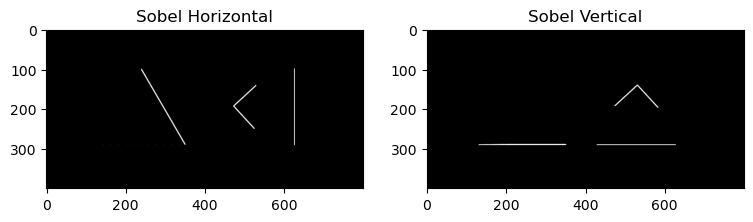

In [101]:
plt.figure(figsize=(9, 6))
# Sobel horizontal
plt.subplot(1, 2, 1)
plt.title("Sobel Horizontal")
plt.imshow(im_h_exp, cmap="gray")

# Sobel vertical
plt.subplot(1, 2, 2)
plt.title("Sobel Vertical")
plt.imshow(im_v_exp, cmap="gray")

In [38]:
lena_h = correlacao(testpat, filtro_h, offset_h)
lena_h_exp = expansao_histograma(lena_h)
lena_v = correlacao(testpat, filtro_v, offset_v)
lena_v_exp = expansao_histograma(lena_v)

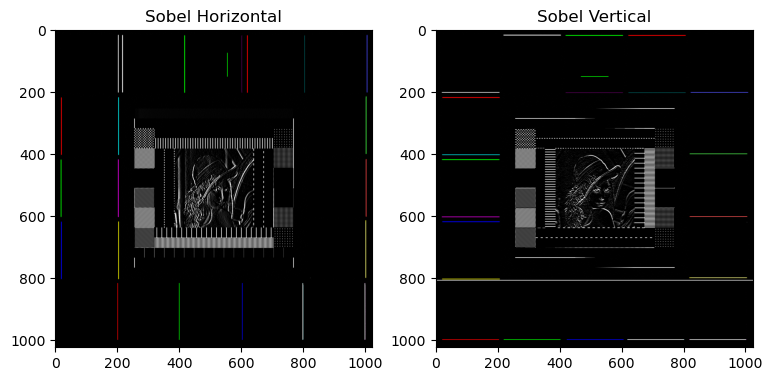

In [39]:
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Sobel Horizontal")
plt.imshow(lena_h_exp, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Sobel Vertical")
plt.imshow(lena_v_exp, cmap="gray")

#### Gaussiano

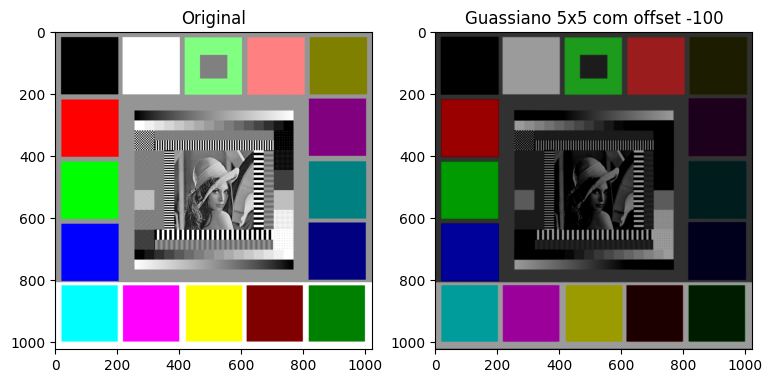

In [7]:
img1 = correlacao(testpat, filtro_g1, offset_g1)
img1 = np.array(img1).astype(np.uint8) 

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(testpat)

plt.subplot(1, 2, 2)
plt.title("Guassiano 5x5 com offset -100")
plt.imshow(img1)

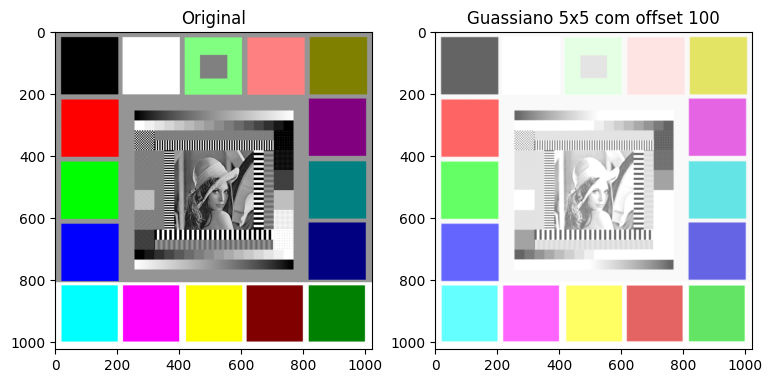

In [8]:
img2 = correlacao(testpat, filtro_g10, offset_g10)
img2 = np.array(img2).astype(np.uint8) 

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(testpat)

plt.subplot(1, 2, 2)
plt.title("Guassiano 5x5 com offset 100")
plt.imshow(img2)

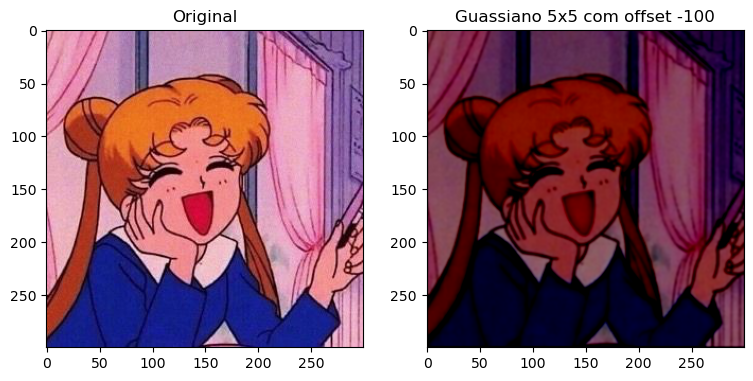

In [49]:
img3 = correlacao(sailor, filtro_g1, offset_g1)
img3 = np.array(img3).astype(np.uint8) 

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(sailor)

plt.subplot(1, 2, 2)
plt.title("Guassiano 5x5 com offset -100")
plt.imshow(img3)

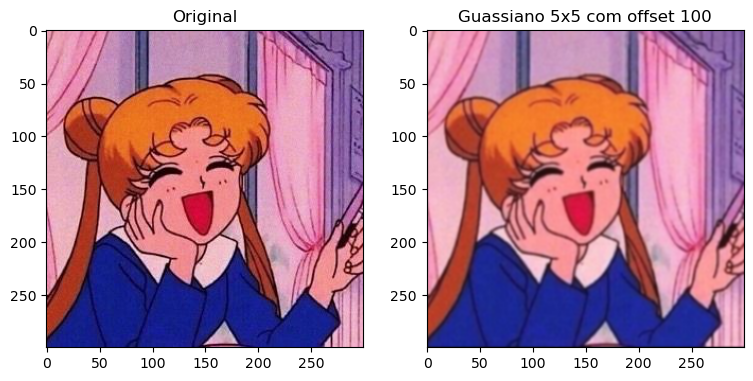

In [50]:
img4 = correlacao(sailor, filtro_g10, offset_g10)
img4 = np.array(img4).astype(np.uint8) 

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(sailor)

plt.subplot(1, 2, 2)
plt.title("Guassiano 5x5 com offset 100")
plt.imshow(img4)

#### Personalizado

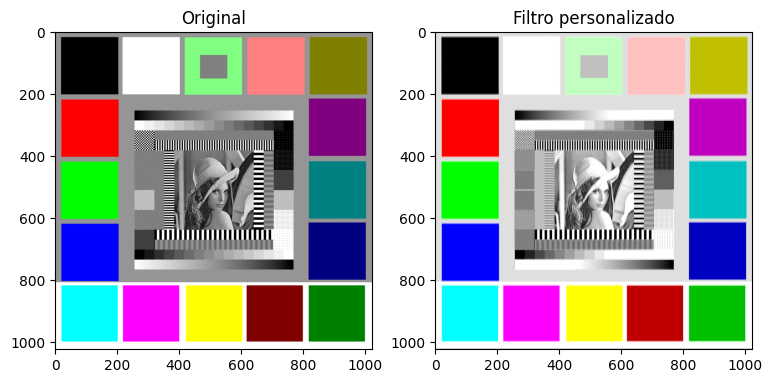

In [13]:
pers = correlacao(testpat, filtro_p, offset_p)
pers = np.array(pers).astype(np.uint8) 

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(testpat)

plt.subplot(1, 2, 2)
plt.title("Filtro personalizado")
plt.imshow(pers)

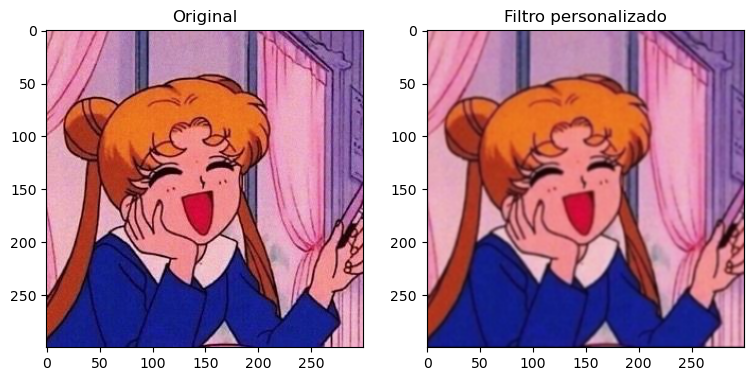

In [109]:
pers = correlacao(sailor, filtro_p, offset_p)
pers = np.array(pers).astype(np.uint8) 

plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(sailor)

plt.subplot(1, 2, 2)
plt.title("Filtro personalizado")
plt.imshow(img)

### Questão 2

> Filtro pontual a seguir, (a) aplicado em RGB, (b) aplicado à banda Y do YIQ, com posterior conversão a RGB.
 No presente trabalho, aplicamos o filtro pontual
na banda Y e posteriormente convertemos a imagem de volta
ao espaço RGB, observando o efeito das transformações na
luminância e crominância.

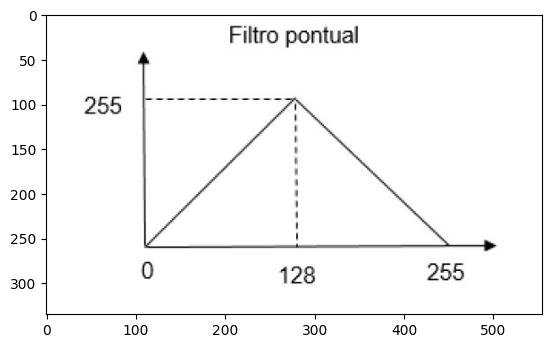

In [17]:
filtro_pontual = iio.imread('filtro.jpg')
plt.imshow(filtro_pontual)

In [10]:
def filtro_pontual(valor):
    """Aplica o filtro pontual de acordo com o gráfico."""
    if valor <= 128:
        return 2 * valor
    else:
        return 2 * (255 - valor)

def aplicar_filtro_rgb(imagem_rgb):
    """Aplica o filtro pontual para cada canal RGB."""
    altura = len(imagem_rgb)
    largura = len(imagem_rgb[0])

    # Criação de uma nova imagem para armazenar o resultado
    imagem_filtrada = [[[0, 0, 0] for _ in range(largura)] for _ in range(altura)]

    for i in range(altura):
        for j in range(largura):
            # Aplica o filtro em cada canal (R, G, B)
            r, g, b = imagem_rgb[i][j]
            imagem_filtrada[i][j][0] = filtro_pontual(r)
            imagem_filtrada[i][j][1] = filtro_pontual(g)
            imagem_filtrada[i][j][2] = filtro_pontual(b)

    return imagem_filtrada

In [11]:
def rgb_to_yiq(r, g, b):
    """Converte um pixel do espaço RGB para YIQ."""
    y = 0.299 * r + 0.587 * g + 0.114 * b
    i = 0.596 * r - 0.275 * g - 0.321 * b
    q = 0.212 * r - 0.523 * g + 0.311 * b
    return y, i, q

def yiq_to_rgb(y, i, q):
    """Converte um pixel do espaço YIQ para RGB."""
    r = y + 0.956 * i + 0.621 * q
    g = y - 0.272 * i - 0.647 * q
    b = y - 1.106 * i + 1.703 * q
    return int(r), int(g), int(b)

def aplicar_filtro_yiq(imagem_rgb):
    """Aplica o filtro pontual na banda Y do YIQ."""
    altura = len(imagem_rgb)
    largura = len(imagem_rgb[0])

    # Criação de uma nova imagem para armazenar o resultado
    imagem_filtrada = [[[0, 0, 0] for _ in range(largura)] for _ in range(altura)]

    for i in range(altura):
        for j in range(largura):
            r, g, b = imagem_rgb[i][j]

            # Converte para YIQ
            y, i_band, q_band = rgb_to_yiq(r, g, b)

            # Aplica o filtro pontual apenas na banda Y
            y_filtrado = filtro_pontual(y)

            # Converte de volta para RGB
            r_filtrado, g_filtrado, b_filtrado = yiq_to_rgb(y_filtrado, i_band, q_band)

            # Armazena os valores na imagem filtrada
            imagem_filtrada[i][j] = [r_filtrado, g_filtrado, b_filtrado]

    return imagem_filtrada

### Testes questão 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


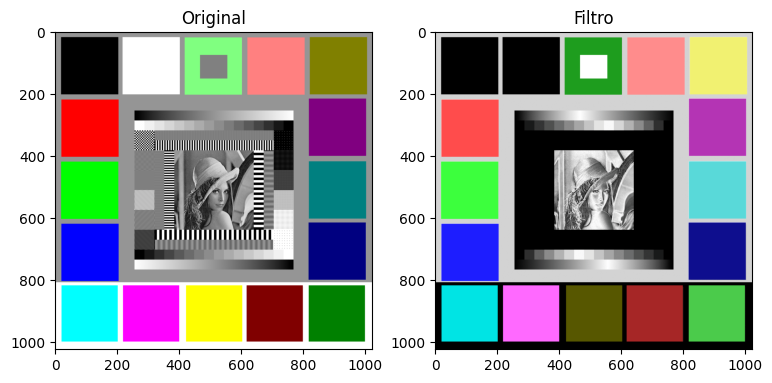

In [12]:
filt_p = aplicar_filtro_yiq(testpat)
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(testpat)

plt.subplot(1, 2, 2)
plt.title("Filtro")
plt.imshow(filt_p)

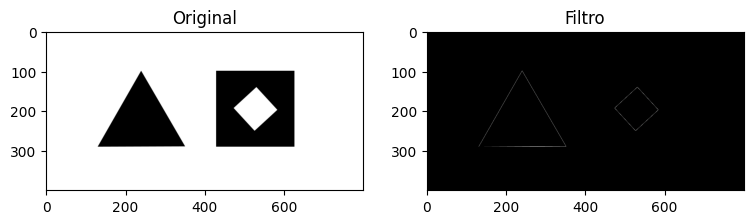

In [14]:
sh = aplicar_filtro_yiq(shapes)
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(shapes)

plt.subplot(1, 2, 2)
plt.title("Filtro")
plt.imshow(sh)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


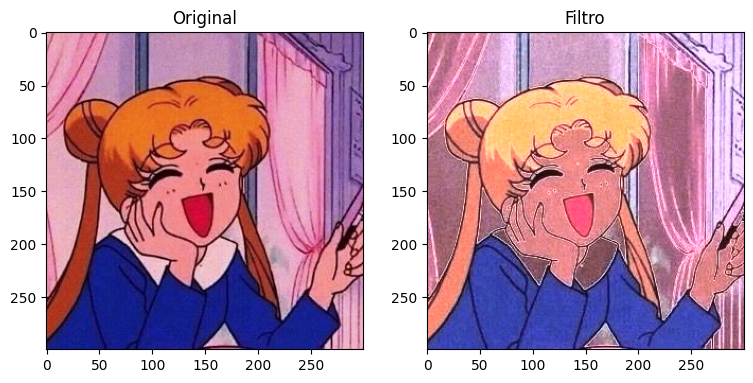

In [15]:
f = aplicar_filtro_yiq(sailor)
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(sailor)

plt.subplot(1, 2, 2)
plt.title("Filtro")
plt.imshow(f)